**Deep Learning - Trabalho Conclusão de Módulo**

> 27/04/2024




**Integrantes**

- André Luiz Pires Guimarães
- Daniel de Souza Miranda
- Iago Nery Mendes
- Lucas Elias de Andrade Cruvinel
- Victor Hugo Brito da Silva Miranda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df_milk = pd.read_csv("RecurrentNeuralNetwork/milk.csv", parse_dates=["Date"])
df_milk.dropna(how='any', axis=0, inplace=True, ignore_index=True)
df_milk.shape

(25846, 10)

In [3]:
# Nome da coluna que deseja mover para a última posição
coluna = 'milk_production'

# Remover a coluna do DataFrame
coluna_removida = df_milk.pop(coluna)

# Inserir a coluna removida na última posição
df_milk.insert(len(df_milk.columns), coluna, coluna_removida)

In [4]:
df_milk.head()

,AnEar,Date,lactation,dim,MilkShif,Cond,Dur,Peak,dim2,milk_production
0,123,2023-01-09,4,1,11.50,5.420,276.0,6.7,1,11.5
1,123,2023-01-10,4,2,24.20,4.945,384.0,15.0,2,48.4
2,123,2023-01-11,4,3,33.20,5.060,672.0,15.5,3,66.4
3,123,2023-01-12,4,4,28.55,4.940,354.0,16.4,4,57.1
4,123,2023-01-13,4,5,39.25,5.055,396.0,17.0,5,78.5


In [5]:
df_milk.tail()

,AnEar,Date,lactation,dim,MilkShif,Cond,Dur,Peak,dim2,milk_production
25841,9977,2023-12-13,2,301,36.40,4.980,540.0,13.8,301,72.8
25842,9977,2023-12-14,2,302,36.50,4.700,600.0,12.9,302,73.0
25843,9977,2023-12-15,2,303,35.45,5.075,540.0,13.3,303,70.9
25844,9977,2023-12-16,2,304,35.30,4.955,516.0,12.0,304,70.6
25845,9977,2023-12-17,2,305,33.85,4.960,522.0,12.3,305,67.7


In [6]:
df_milk['AnEar'].value_counts()

AnEar
123     305
8947    305
9066    305
9078    305
9081    305
       ... 
9525    304
9549    304
8064    304
7761    301
8732    259
Name: count, Length: 85, dtype: int64

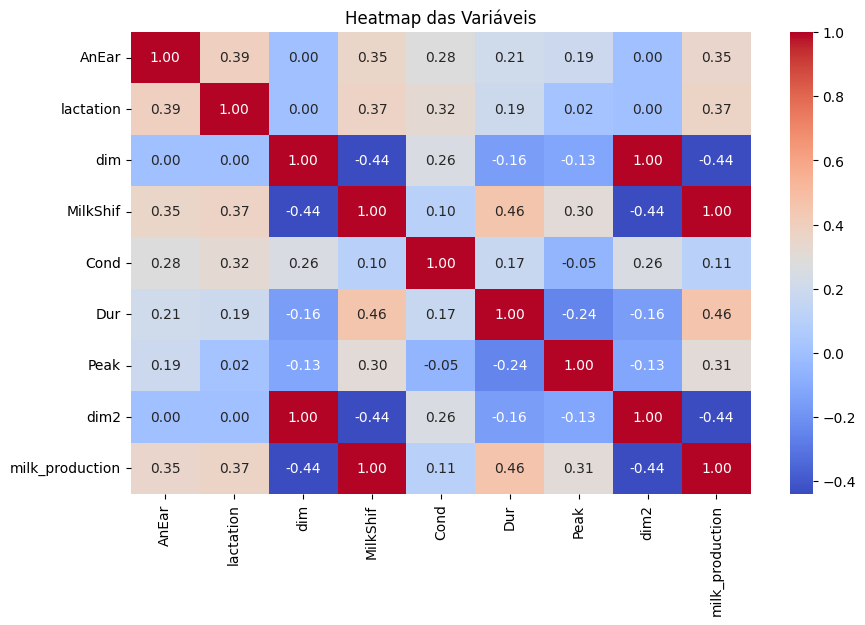

In [7]:
#Definindo as variáveis para o heatmap
variaveis = ['AnEar', 'lactation', 'dim', 'MilkShif', 'Cond', 'Dur', 'Peak', 'dim2', 'milk_production']

#Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_milk[variaveis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap das Variáveis')
plt.show() 

Text(0.5, 1.0, 'Produção de Leite')

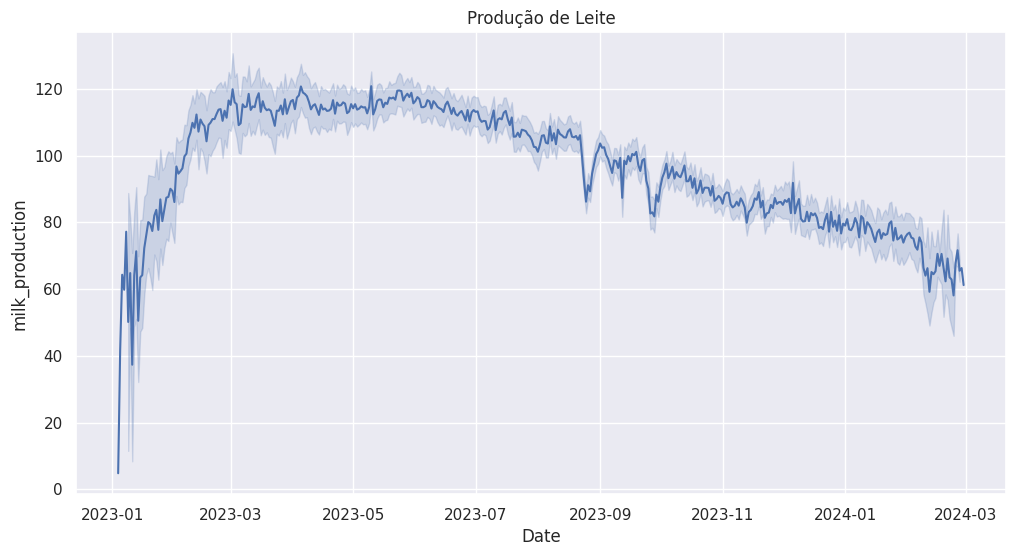

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.lineplot(x=df_milk["Date"], y="milk_production", data=df_milk).set_title("Produção de Leite")

Armotizando a visualização:

<Axes: xlabel='Date'>

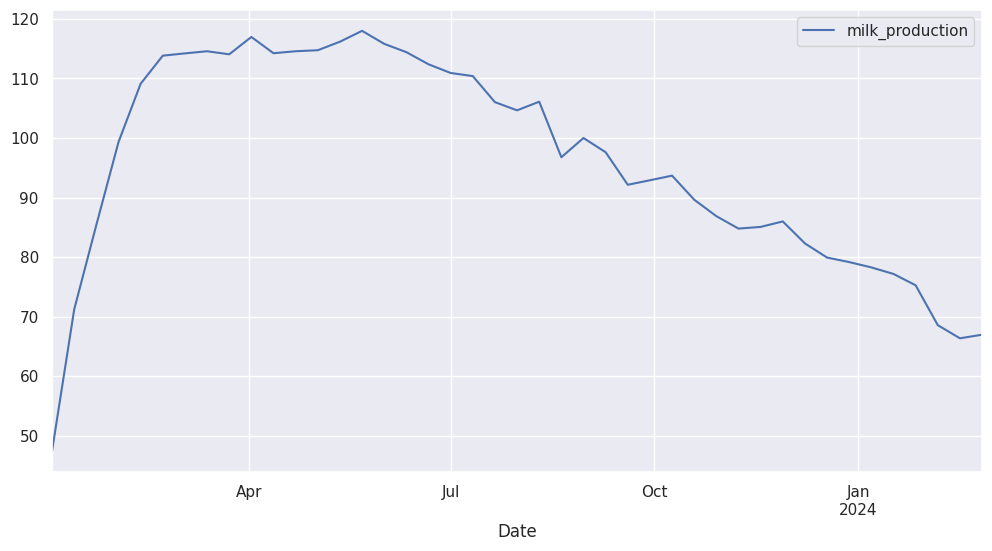

In [9]:
df_milk_am = pd.read_csv("RecurrentNeuralNetwork/milk.csv", parse_dates=["Date"])[["milk_production", "Date"]]
df_milk_am.set_index("Date", inplace=True)
df_milk_am.resample('10D').mean().plot(figsize=(12,6))

In [10]:
df_milk_copy = df_milk.copy()

In [11]:
#df_milk.drop('AnEar', axis=1, inplace=True)
df_milk.drop('Date', axis=1, inplace=True)
df_milk.drop('Cond', axis=1, inplace=True)
df_milk.drop('Dur', axis=1, inplace=True)
df_milk.drop('Peak', axis=1, inplace=True)
df_milk.drop('dim2', axis=1, inplace=True)

In [12]:
df_milk.head()

,AnEar,lactation,dim,MilkShif,milk_production
0,123,4,1,11.50,11.5
1,123,4,2,24.20,48.4
2,123,4,3,33.20,66.4
3,123,4,4,28.55,57.1
4,123,4,5,39.25,78.5


Verificando a frequência da lactação

In [13]:
# Agrupar os dados pela combinação única de valores nas colunas 'AnEar' e 'lactation'
agrupado = df_milk_copy.groupby(['AnEar', 'lactation']).size().reset_index(name='count')
print(agrupado)

# Contar o número de vacas únicas para cada valor de lactation
frequencia = agrupado.groupby('lactation')['AnEar'].count()

# Exibir a frequência de vacas únicas com base no número de lactation
print("Frequência de vacas únicas com base no número de lactation:")
print((frequencia))


    AnEar  lactation  count
0     123          4    305
1    1009          2    305
2    1017          2    305
3    1209          1    305
4    1218          1    305
..    ...        ...    ...
80   9951          2    305
81   9961          2    305
82   9967          2    305
83   9968          2    304
84   9977          2    305

[85 rows x 3 columns]
Frequência de vacas únicas com base no número de lactation:
lactation
1    14
2    26
3    16
4    15
5     5
6     7
7     1
8     1
Name: AnEar, dtype: int64


In [14]:
codigos_vacas = np.array(df_milk_copy["AnEar"].unique())
print(codigos_vacas)

[ 123 1009 1017 1209 1218 1242 1243 1275 1280 1305 1327 1329 1341 1362
 1368 1387 1393 7761 8064 8334 8385 8393 8434 8435 8438 8509 8581 8667
 8723 8732 8741 8932 8947 8996 9005 9066 9069 9078 9081 9090 9101 9149
 9188 9207 9284 9346 9363 9388 9389 9431 9463 9464 9478 9487 9488 9525
 9529 9549 9558 9562 9583 9885 9891 9892 9894 9908 9909 9910 9917 9918
 9920 9922 9926 9928 9929 9933 9939 9943 9944 9946 9951 9961 9967 9968
 9977]


In [15]:
train = []
validation = []
test = []

In [16]:
df_milk[(df_milk['lactation'] == 4) & (df_milk['AnEar'] == 123)]

,AnEar,lactation,dim,MilkShif,milk_production
0,123,4,1,11.50,11.5
1,123,4,2,24.20,48.4
2,123,4,3,33.20,66.4
3,123,4,4,28.55,57.1
4,123,4,5,39.25,78.5
...,...,...,...,...,...
300,123,4,301,24.65,49.3
301,123,4,302,23.00,46.0
302,123,4,303,24.80,49.6
303,123,4,304,23.30,46.6


In [17]:
#for i in range(len(frequencia)):
#    #dados_vaca = df_milk.loc[((df_milk['lactation'] == i))]
#    # Dividir as vacas do grupo atual em treinamento, validação e teste
#    df_temp = df_milk[df_milk['lactation'] == i+1]
#    vacas_treinamento, vacas_temp = train_test_split(df_temp, train_size=0.6, random_state=42)
#    vacas_validacao, vacas_teste = train_test_split(vacas_temp, train_size=0.5, random_state=42)
#    for i in range(len(vacas_treinamento)):
#        train.append(vacas_treinamento)
#    for j in range(len(vacas_validacao)):
#        validation.append(vacas_validacao)
#        test.append(vacas_teste)
#print(len(train))
#print(len(validation))
#print(len(test))
#print(len(train) + len(validation) + len(test))

In [17]:
teste_anear = df_milk[(df_milk['lactation'] == 4) & (df_milk['AnEar'] == 123)]
teste_anear

,AnEar,lactation,dim,MilkShif,milk_production
0,123,4,1,11.50,11.5
1,123,4,2,24.20,48.4
2,123,4,3,33.20,66.4
3,123,4,4,28.55,57.1
4,123,4,5,39.25,78.5
...,...,...,...,...,...
300,123,4,301,24.65,49.3
301,123,4,302,23.00,46.0
302,123,4,303,24.80,49.6
303,123,4,304,23.30,46.6


# Separação de vacas

Lógica utilizada atualmente

In [18]:
def janelas_da_vaca_2(df, nome_vaca, tam):
    tam_train = int(tam * 0.7)
    janelas_train = []
    janelas_val = []
    janelas_test = []
    input_vaca = df[df["AnEar"]==nome_vaca].to_numpy()
    target_vaca = df[df["AnEar"]==nome_vaca]["milk_production"].to_numpy()
    #print("Input vaca:", input_vaca[1][1:4])
    #print("Target vaca:", target_vaca[1])
    for i in range(tam_train):
        #print("i:", i)
        janelas_train.append([input_vaca[i][1:4], [target_vaca[i]]])
        #print("VACA", input[1:4])
    for j in range(tam_train, tam+1, 1):
        #print("j:", j, "tamanho:", range(tam_train+1, tam_train+1, 1))
        janelas_val.append([input_vaca[j-1][1:4], [target_vaca[j-1]]])
    for k in range(tam+1, len(input_vaca)+1, 1):
        #print("k:", k, "tamanho:", range(tam, len(input_vaca), 1))
        janelas_test.append([input_vaca[k-1][1:4], [target_vaca[k-1]]])

    return janelas_train, janelas_val, janelas_test

tam_janela = 50
janelas_2 = {'xtrain':[], 'xval':[], 'xtest':[], 'ytrain':[], 'yval':[], 'ytest':[]}
janelas_data = [janelas_da_vaca_2(df_milk, vaca, tam_janela) for vaca in codigos_vacas]
for janelas_treino, janelas_validacao, janelas_teste in janelas_data:
    for janela in janelas_treino:
        janelas_2["xtrain"].append(janela[0])
        janelas_2["ytrain"].append(janela[1])
    for janela in janelas_validacao:
        janelas_2["xval"].append(janela[0])
        janelas_2["yval"].append(janela[1])
    for janela in janelas_teste:
        janelas_2["xtest"].append(janela[0])
        janelas_2["ytest"].append(janela[1])

X_train, y_train = np.array(janelas_2["xtrain"]), np.array(janelas_2["ytrain"])
X_val, y_val = np.array(janelas_2["xval"]), np.array(janelas_2["yval"])
X_test, y_test = np.array(janelas_2["xtest"]), np.array(janelas_2["ytest"])

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(2975, 3) (2975, 1)
(1360, 3) (1360, 1)
(21596, 3) (21596, 1)


In [19]:
print("Input Treino:", X_train[1], "Target Treino:", y_train[1])
print("Input Validação:", X_train[0], "Target Validação:", y_train[0])
print("Input Teste:", X_train[0], "Target Teste:", y_train[0])

Input Treino: [ 4.   2.  24.2] Target Treino: [48.4]
Input Validação: [ 4.   1.  11.5] Target Validação: [11.5]
Input Teste: [ 4.   1.  11.5] Target Teste: [11.5]


# Separação da vacas

Esta lógica não está sendo aplicada.

In [ ]:
#np_vacas_train = np.array([])
#np_vacas_val = np.array([])
#np_vacas_test = np.array([])
#
#for i in range(len(frequencia)):
#    df_temp_lac = df_milk[df_milk['lactation'] == i+1]
#    AnEar_array = df_temp_lac['AnEar'].unique()
#
#    # Ordem invertida para garantir que vamos pegar os valores de lactação 7 e 8 para o treinamento, pois estes têm somente 1 valor de cada
#    vacas_test, vacas_val, vacas_train = np.split(AnEar_array, [int(len(AnEar_array)*0.2), int(len(AnEar_array)*0.4)])
#
#    np_vacas_train = np.append(np_vacas_train, vacas_train)
#    np_vacas_val = np.append(np_vacas_val, vacas_val)
#    np_vacas_test = np.append(np_vacas_test, vacas_test)
#
#print("Vacas Treino:", np_vacas_train, "\nQuantidade de vacas treino:", len(np_vacas_train))
#print("Vacas Validação:",np_vacas_val, "\nQuantidade de vacas validação:", len(np_vacas_val))
#print("Vacas Teste:",np_vacas_test, "\nQuantidade de vacas teste:", len(np_vacas_test))

Vacas Treino: [1280. 1305. 1327. 1329. 1341. 1362. 1368. 1387. 1393. 9918. 9920. 9922.
 9926. 9928. 9929. 9933. 9939. 9943. 9944. 9946. 9951. 9961. 9967. 9968.
 9977. 9464. 9478. 9487. 9488. 9525. 9529. 9549. 9558. 9562. 9583. 9069.
 9078. 9081. 9090. 9101. 9149. 9188. 9207. 9284. 8723. 8732. 8741. 8393.
 8434. 8435. 8438. 8509. 8064. 7761.] 
Quantidade de vacas treino: 54
Vacas Validação: [1242. 1243. 1275. 9894. 9908. 9909. 9910. 9917. 9389. 9431. 9463. 8996.
 9005. 9066. 8667. 8385.] 
Quantidade de vacas validação: 16
Vacas Teste: [1209. 1218. 1009. 1017. 9885. 9891. 9892. 9346. 9363. 9388.  123. 8932.
 8947. 8581. 8334.] 
Quantidade de vacas teste: 15


In [ ]:
#vacas = {'train':np_vacas_train, 'val':np_vacas_val, 'test':np_vacas_test}
##dict_dfs = {'df_train':list_train, 'df_val':list_val, 'df_test':list_test}

In [ ]:
#def janelas_da_vaca(df, nome_vaca, tam):
#    janelas = []
#    input_vaca = df[df["AnEar"]==nome_vaca].to_numpy()
#    target_vaca = df[df["AnEar"]==nome_vaca]["milk_production"].to_numpy()
#    #print("Input vaca:", input_vaca[1][1:4])
#    #print("Target vaca:", target_vaca[1])
#    for i in range(tam):
#        janelas.append([input_vaca[i][1:4], [target_vaca[i]]])
#        #print("VACA", input[1:4])
#    return janelas
#
#tam_janela = 50
#janelas = {'xtrain':[], 'xval':[], 'xtest':[], 'ytrain':[], 'yval':[], 'ytest':[]}
#for tipo in ['train', 'val', 'test']:
#    janelas_tipos = [janelas_da_vaca(df_milk, vaca, tam_janela) for vaca in vacas[tipo]]
#    for vaca in janelas_tipos:
#        for janela in vaca:
#            janelas[f"x{tipo}"].append(janela[0])
#            janelas[f"y{tipo}"].append(janela[1])
#
#X_train, y_train = np.array(janelas["xtrain"]), np.array(janelas["ytrain"])
#X_val, y_val = np.array(janelas["xval"]), np.array(janelas["yval"])
#X_test, y_test = np.array(janelas["xtest"]), np.array(janelas["ytest"])
#
#print(X_train.shape, y_train.shape)
#print(X_val.shape, y_val.shape)
#print(X_test.shape, y_test.shape)

(2700, 3) (2700, 1)
(800, 3) (800, 1)
(750, 3) (750, 1)


In [ ]:
#print("Inputs Treinamento:", X_train[2])
#print("Target Treinamento:", y_train[2])

Inputs Treinamento: [ 1.   3.  27.2]
Target Treinamento: [54.4]


In [20]:
xsc = MinMaxScaler().fit(X_train)
X_train = xsc.transform(X_train)
X_val = xsc.transform(X_val)
X_test = xsc.transform(X_test)

#X_train = X_train.reshape((len(X_train), tam_janela, 1))
#X_val = X_val.reshape((len(X_val), tam_janela, 1))
#X_test = X_test.reshape((len(X_test), tam_janela, 1))

ysc = MinMaxScaler().fit(y_train)
y_train = ysc.transform(y_train)
y_val = ysc.transform(y_val)
y_test = ysc.transform(y_test)

## Construção da Rede Neural

In [21]:
import tensorflow as tf
from keras import Sequential, Model, layers, callbacks, optimizers
#from keras.models import Sequential, Model
#from keras.layers import Dense, Flatten, Dropout, BatchNormalization
#from keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor, KerasClassifier

2024-05-01 23:01:53.290524: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 23:01:53.338973: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 23:01:53.339005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 23:01:53.340241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 23:01:53.350781: I tensorflow/core/platform/cpu_feature_guar

In [23]:
def get_model(hidden_layer_sizes, dropout, learning_rate):
  model=Sequential()
  model.add(layers.InputLayer((3,)))
  model.add(layers.Flatten())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(hidden_layer_sizes, activation="relu", kernel_initializer="he_uniform"))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(1,activation="linear"))

  #final_model = Model([model.input], out)
  model.compile(loss='mean_absolute_error', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['mae'])

  return model

In [24]:
import keras
keras.__version__

'3.3.3'

In [22]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-05-01 23:02:02.819182: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 23:02:02.872755: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 23:02:02.872798: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [29]:
# Criando o objeto KerasClassifier
#keras_clf = KerasRegressor(model = get_model, loss="mean_squared_error", optimizer="adam", optimizer__learning_rate= 0.1, hidden_layer_sizes = 100, dropout = 0.0, batch_size=32, verbose=False)
#keras_clf = KerasRegressor(model= get_model(), dropout=0.3,  hidden_layer_sizes= 256, learnRate=1e-2, verbose=False)
keras_clf = KerasRegressor(model=get_model, dropout=0.3, hidden_layer_sizes=256, learning_rate=0.01, loss=mean_absolute_error)

# define a grid of the hyperparameter search space
hidden_layer_sizes = [256, 512]
learnRate = [1e-2, 1e-3]
dropout = [0.3, 0.5]
batchSize = [32]

# create a dictionary from the hyperparameter grid
grid = dict(
	hidden_layer_sizes=hidden_layer_sizes,
	learning_rate=learnRate,
	dropout=dropout,
	batch_size=batchSize
)

## Definindo os valores dos hiperparâmetros
#parameters = {
#    'optimizer': ['sgd', 'adam'],
#    'optimizer__learning_rate': [0.1, 0.001, 0.0001],
#    'model__dropout': [0.3, 0.4, 0.5],
#    'model__hidden_layer_sizes': [100, 300, 600]
#}

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=keras_clf, param_grid=grid, n_jobs=4, cv=3, error_score='raise')

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="tensorboard", histogram_freq=5000, update_freq='batch', write_grads=True)
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="tensorboard", histogram_freq=5000, update_freq='batch')

# Treinando o grid search
grid_result = grid_search.fit(X_train, y_train, epochs=50, validation_data=(X_val,y_val))




print(grid_result.best_score_, grid_result.best_params_)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2024-05-01 22:35:51.146067: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:35:51.146112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:35:51.146605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:35:51.146637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:35:51.147486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory

Epoch 1/50
Epoch 1/50
Epoch 1/50


I0000 00:00:1714613774.438589  277940 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


49/62 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 1.1957 - mae: 1.1957 

I0000 00:00:1714613788.927074  277931 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
I0000 00:00:1714613790.491271  277945 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - loss: 1.2329 - mae: 1.2329 - val_loss: 0.1996 - val_mae: 0.1996
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 443ms/step - loss: 1.1047 - mae: 1.1047 - val_loss: 0.3299 - val_mae: 0.3299
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2110 - mae: 0.2110 - val_loss: 0.2413 - val_mae: 0.2413
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1269 - mae: 0.1269 - val_loss: 0.1339 - val_mae: 0.1339
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0783 - mae: 0.0783 - val_loss: 0.0735 - val_mae: 0.0735
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0569 - mae: 0.0569 - val_loss: 0.0795 - val_mae: 0.0795
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.1890 - mae: 0.1890 - val_loss: 0.2606 - val_mae: 0.2606
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1293 - mae: 0.1293 - val_loss: 0.0674 - val_mae: 0.0674
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0809 - mae: 0.08

2024-05-01 22:39:27.232710: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:39:27.232913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:39:27.241834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2098 - mae: 2.2098  

2024-05-01 22:39:28.382587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


51/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5067 - mae: 2.5067  Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - loss: 2.1701 - mae: 2.1701 - val_loss: 0.3697 - val_mae: 0.3697
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 214ms/step - loss: 2.3088 - mae: 2.3088 - val_loss: 0.7418 - val_mae: 0.7418
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4263 - mae: 0.4263 - val_loss: 0.1091 - val_mae: 0.1091
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.3155 - mae: 0.3155 - val_loss: 0.1240 - val_mae: 0.1240
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1517 - mae: 0.1517 - val_loss: 0.0321 - val_mae: 0.0321
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0784 - mae: 0.0784 - val_loss: 0.0527 - val_mae: 0.0527
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.1193 - mae: 0.1193 - val_loss: 0.0452 - val_mae: 0.0452
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0690 - mae: 0.0690 - val_loss: 0.0378 - val_mae: 0.

I0000 00:00:1714613988.796267  294895 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0549 - mae: 0.0549 - val_loss: 0.0711 - val_mae: 0.0711
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0543 - mae: 0.0543 - val_loss: 0.0618 - val_mae: 0.0618
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0547 - mae: 0.0547 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0525 - mae: 0.0525 - val_loss: 0.0631 - val_mae: 0.0631
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0557 - mae: 0.0557 - val_loss: 0.0747 - val_mae: 0.0747
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0577 - mae: 0.0577 - val_loss: 0.0430 - val_mae: 0.0430
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0491 - mae: 0.0491 - val_loss: 0.0513 - val_mae: 0.0513
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0484 - mae: 0.0484 - val_loss: 0.0581 - val_mae: 0.0581
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0506 - mae: 0.0506 

2024-05-01 22:40:38.654980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:40:38.655177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:40:38.656071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 1/50


2024-05-01 22:40:39.358538: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50
47/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1772 - mae: 1.1772

I0000 00:00:1714614049.342801  302253 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - loss: 1.1525 - mae: 1.1525 - val_loss: 0.1701 - val_mae: 0.1701
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8076 - mae: 0.8076 - val_loss: 0.2249 - val_mae: 0.2249
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6731 - mae: 0.6731 - val_loss: 0.3276 - val_mae: 0.3276
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - loss: 1.1395 - mae: 1.1395 - val_loss: 0.3334 - val_mae: 0.3334
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8595 - mae: 0.8595 - val_loss: 0.7022 - val_mae: 0.7022
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7371 - mae: 0.7371 - val_loss: 0.1264 - val_mae: 0.1264
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5095 - mae: 0.5095 - val_loss: 0.1859 - val_mae: 0.1859
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.5230 - mae: 0.5230 - val_loss: 0.1540 - val_mae: 0.1540
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3572 - mae: 0.35

2024-05-01 22:41:31.442720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:41:31.442766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:41:31.443552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 22:41:32.075733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.2422 - mae: 1.2422 - val_loss: 0.5806 - val_mae: 0.5806
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9612 - mae: 0.9612 - val_loss: 0.3257 - val_mae: 0.3257
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7518 - mae: 0.7518 - val_loss: 0.2248 - val_mae: 0.2248
Epoch 4/50


I0000 00:00:1714614099.871451  307791 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.5600 - mae: 0.5600 - val_loss: 0.1405 - val_mae: 0.1405
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4242 - mae: 0.4242 - val_loss: 0.1268 - val_mae: 0.1268
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3139 - mae: 0.3139 - val_loss: 0.1515 - val_mae: 0.1515
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2215 - mae: 0.2215 - val_loss: 0.1850 - val_mae: 0.1850
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1361 - mae: 0.1361 - val_loss: 0.2003 - val_mae: 0.2003
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0929 - mae: 0.0929 - val_loss: 0.1035 - val_mae: 0.1035
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0816 - mae: 0.0816 - val_loss: 0.0967 - val_mae: 0.0967
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0724 - mae: 0.0724 - val_loss: 0.1654 - val_mae: 0.1654
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0744 - mae: 0.0744

2024-05-01 22:44:07.019937: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:44:07.019994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:44:07.020800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 22:44:07.579252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.4865 - mae: 1.4865 - val_loss: 0.1734 - val_mae: 0.1734
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0478 - mae: 1.0478 - val_loss: 0.1342 - val_mae: 0.1342
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8239 - mae: 0.8239 - val_loss: 0.2424 - val_mae: 0.2424
Epoch 4/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7233 - mae: 0.7233Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.6377 - mae: 0.6377 - val_loss: 0.1704 - val_mae: 0.1704
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4736 - mae: 0.4736 - val_loss: 0.1791 - val_mae: 0.1791
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3354 - mae: 0.3354 - val_loss: 0.1911 - val_mae: 0.1911
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2104 - mae: 0.2104 - val_loss: 0.2323 - val_mae: 0.2323
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1326 - mae: 0.1326 - val_loss: 0.2132 - val_mae: 0.2132
Ep

I0000 00:00:1714614258.569062  324140 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0788 - mae: 0.0788 - val_loss: 0.1024 - val_mae: 0.1024
Epoch 17/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0781 - mae: 0.0781 - val_loss: 0.1276 - val_mae: 0.1276
Epoch 18/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0741 - mae: 0.0741 - val_loss: 0.1101 - val_mae: 0.1101
Epoch 19/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0732 - mae: 0.0732 - val_loss: 0.1126 - val_mae: 0.1126
Epoch 20/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0759 - mae: 0.0759 - val_loss: 0.1163 - val_mae: 0.1163
Epoch 21/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0682 - mae: 0.0682 - val_loss: 0.1024 - val_mae: 0.1024
Epoch 22/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.0996 - val_mae: 0.0996
Epoch 23/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - loss: 1.9985 - mae: 1.9985 - val_loss: 0.3775 - val_mae: 0.3775
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7073 - mae: 

2024-05-01 22:44:44.234334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:44:44.234384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:44:44.235025: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 22:44:44.679438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


I0000 00:00:1714614291.407393  328559 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - loss: 1.9252 - mae: 1.9252 - val_loss: 1.0704 - val_mae: 1.0704
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6727 - mae: 0.6727 - val_loss: 0.3947 - val_mae: 0.3947
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2460 - mae: 0.2460 - val_loss: 0.0709 - val_mae: 0.0709
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1019 - mae: 0.1019 - val_loss: 0.0716 - val_mae: 0.0716
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - mae: 0.0723 - val_loss: 0.0710 - val_mae: 0.0710
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0678 - mae: 0.0678 - val_loss: 0.0864 - val_mae: 0.0864
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0666 - mae: 0.0666 - val_loss: 0.0474 - val_mae: 0.0474
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0672 - mae: 0.0672 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0670 - mae: 0.0670 - 

2024-05-01 22:45:51.817505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 22:45:51.817537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 22:45:51.818486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 22:45:52.416399: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/50


I0000 00:00:1714614359.162310  336709 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 1.4600 - mae: 1.4600 - val_loss: 0.0735 - val_mae: 0.0735
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1073 - mae: 1.1073 - val_loss: 0.0915 - val_mae: 0.0915
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8892 - mae: 0.8892 - val_loss: 0.0939 - val_mae: 0.0939
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6668 - mae: 0.6668 - val_loss: 0.0742 - val_mae: 0.0742
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4824 - mae: 0.4824 - val_loss: 0.1548 - val_mae: 0.1548
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3127 - mae: 0.3127 - val_loss: 0.2126 - val_mae: 0.2126
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1955 - mae: 0.1955 - val_loss: 0.2322 - val_mae: 0.2322
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1222 - mae: 0.1222 - val_loss: 0.2270 - val_mae: 0.2270
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0997 - mae: 0.0997 - 

KeyboardInterrupt: 

In [29]:
testt = keras_clf.get_params().keys()
testt

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])